## Importing Important libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Data Preprocessing

In [4]:
# Loading Dataset using pandas

df = pd.read_csv('/content/drive/MyDrive/Data Sets/Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
# Dropping User ID column as it is not an important feature

df = df.drop(columns=['User ID'])

In [7]:
# Checking if the column is removed successfully

df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [8]:
# Initializing label encoder

le = LabelEncoder()

In [9]:
# Using label encoder to encode Gender column because it has only boolean values and label encoder is best choice for this column.


df['Encoded_Gender'] = le.fit_transform(df['Gender'])

In [10]:
# Checking if the data is encoded properly

df.head()

,Gender,Age,EstimatedSalary,Purchased,Encoded_Gender
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [11]:
df['Purchased'].unique()

array([0, 1])

In [12]:
# Enoding Pruchased Column using label encoder (NOTE: All though purchased column already contain boolean numerical values i don't see the need but still i will encode it)

df['Encoded_Purchased'] = le.fit_transform(df['Purchased'])

In [13]:
# Checking if the column is properly encoded

df.head()

,Gender,Age,EstimatedSalary,Purchased,Encoded_Gender,Encoded_Purchased
0,Male,19,19000,0,1,0
1,Male,35,20000,0,1,0
2,Female,26,43000,0,0,0
3,Female,27,57000,0,0,0
4,Male,19,76000,0,1,0


In [14]:
# Initializing Standerd Scaler

sc = StandardScaler()

In [15]:
# Standerdizing Age and EstimatedSalary Column

df[['Age','EstimatedSalary']] = sc.fit_transform(df[['Age','EstimatedSalary']])

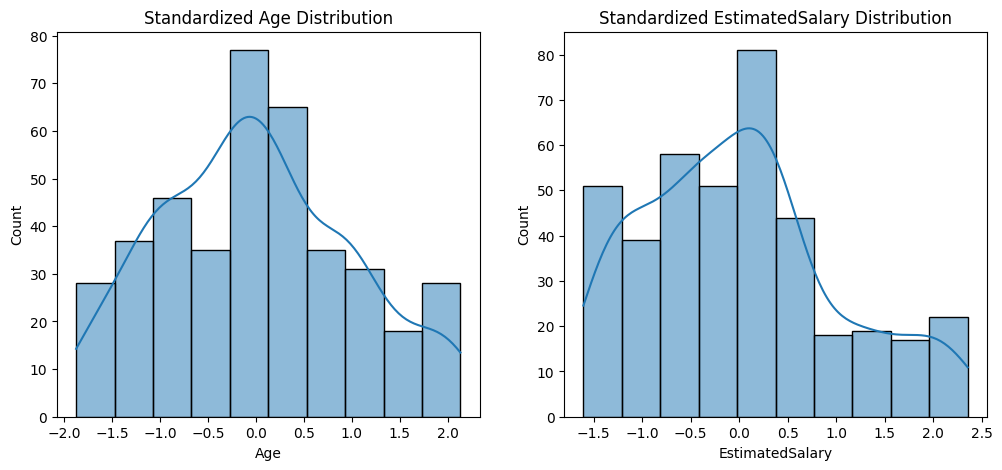

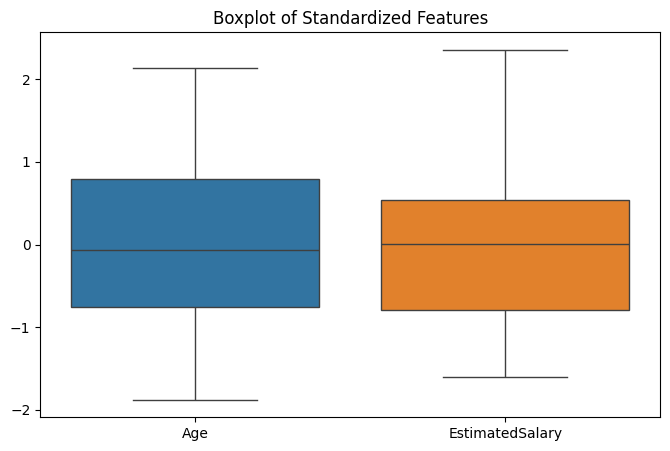

In [16]:
# Plot histograms to check distribution

# Checking visually if the data is scaled

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['Age'], kde=True, bins=10)
plt.title('Standardized Age Distribution')

plt.subplot(1,2,2)
sns.histplot(df['EstimatedSalary'], kde=True, bins=10)
plt.title('Standardized EstimatedSalary Distribution')

plt.show()

# Boxplot for further verification
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Age', 'EstimatedSalary']])
plt.title("Boxplot of Standardized Features")
plt.show()


# Model Building

In [17]:
# Selecting features and target variable

X = df[['Encoded_Gender', 'Age', 'EstimatedSalary']]  # Using encoded gender instead of raw text
y = df['Purchased']  # Target variable


In [18]:
# Splitting dataset into training (75%) and testing (25%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [19]:
# Train Gaussian Naive Bayes

gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

In [20]:
# Train K-Nearest Neighbors for k=3, 5, and 7

# Dictionary to store trained KNN models for different values of k

knn_models = {}
for k in [3, 5, 7]:

    # Create a KNN classifier with k neighbors

    knn = KNeighborsClassifier(n_neighbors=k)
   # Train the KNN model using the training data

    knn.fit(X_train, y_train)
  # Store the trained model in the dictionary with k as the key

    knn_models[k] = knn

# Now, knn_models[3] is the model trained with k=3,
# knn_models[5] is trained with k=5, and knn_models[7] is trained with k=7



In [21]:
# Train Decision Tree with Gini and Entropy criteria

# Create a Decision Tree model using the Gini impurity criterion


dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

# Create a Decision Tree model using the Entropy criterion (information gain)

dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the Decision Tree with the Gini criterion using the training data

dt_gini.fit(X_train, y_train)

# Train the Decision Tree with the Entropy criterion using the training data

dt_entropy.fit(X_train, y_train)

print("Models trained successfully!")


Models trained successfully!


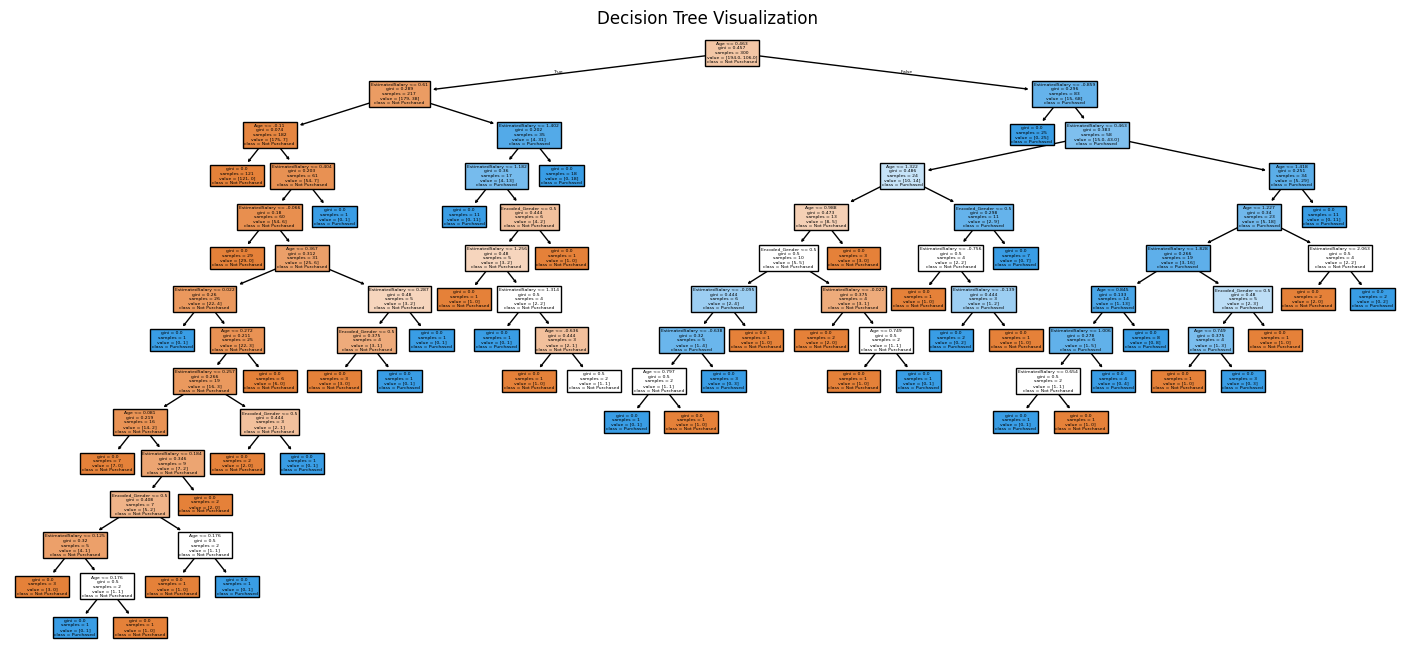

In [28]:
# Plotting the diagram of my decison tree.


plt.figure(figsize=(18, 8))
plot_tree(dt_gini, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'], filled=True)

plt.title("Decision Tree Visualization")
plt.show()


In [29]:
# Creating function to evaluate the model.

def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates a trained classification model using key performance metrics:
    Accuracy, Precision, Recall, F1-Score, Classification Report, and Confusion Matrix.
    """

    # Generate predictions using the trained model

    y_pred = model.predict(X_test)

    # Compute key evaluation metrics

    accuracy = accuracy_score(y_test, y_pred)  # Overall correctness of predictions
    precision = precision_score(y_test, y_pred)  # Ability to avoid false positives
    recall = recall_score(y_test, y_pred)  # Ability to identify actual positives
    f1 = f1_score(y_test, y_pred)  # Balance between precision and recall

    # Print model performance metrics
    print(f" Evaluation Results for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")  # Overall accuracy of predictions
    print(f"Precision: {precision:.4f}")  # Precision score
    print(f"Recall: {recall:.4f}")  # Recall score
    print(f"F1-Score: {f1:.4f}")  # F1-score for balanced evaluation

    # Display classification report for detailed class-wise metrics
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Compute and visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))

    # Heatmap visualization of confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])

    # Axis labels and title
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title(f"Confusion Matrix for {model_name}")

    # Display the confusion matrix plot
    plt.show()

 Evaluation Results for Gaussian Naive Bayes:
Accuracy: 0.9300
Precision: 0.9412
Recall: 0.8649
F1-Score: 0.9014

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.94      0.86      0.90        37

    accuracy                           0.93       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



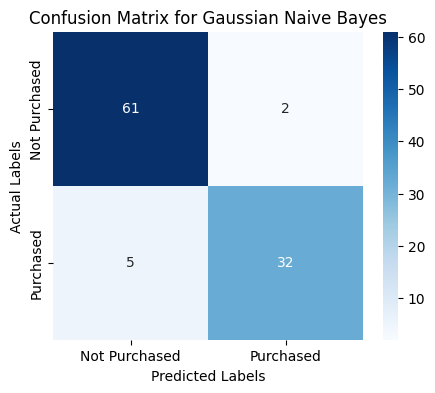

 Evaluation Results for KNN (k=3):
Accuracy: 0.9100
Precision: 0.8684
Recall: 0.8919
F1-Score: 0.8800

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        63
           1       0.87      0.89      0.88        37

    accuracy                           0.91       100
   macro avg       0.90      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



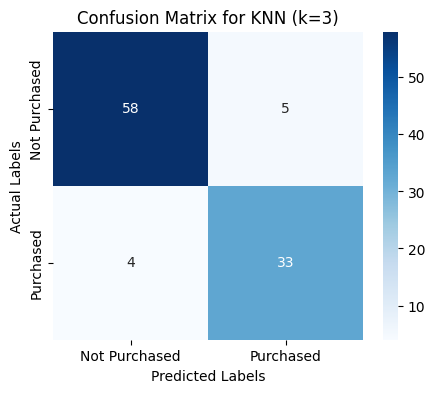

 Evaluation Results for KNN (k=5):
Accuracy: 0.9200
Precision: 0.8718
Recall: 0.9189
F1-Score: 0.8947

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        63
           1       0.87      0.92      0.89        37

    accuracy                           0.92       100
   macro avg       0.91      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



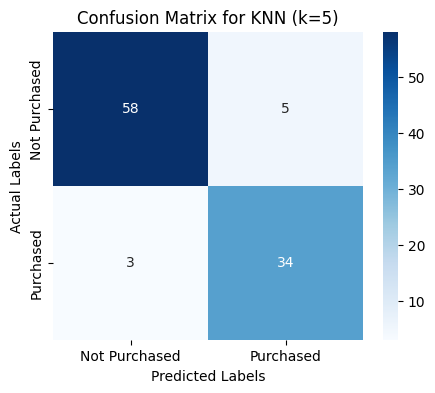

 Evaluation Results for KNN (k=7):
Accuracy: 0.9300
Precision: 0.8750
Recall: 0.9459
F1-Score: 0.9091

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.88      0.95      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



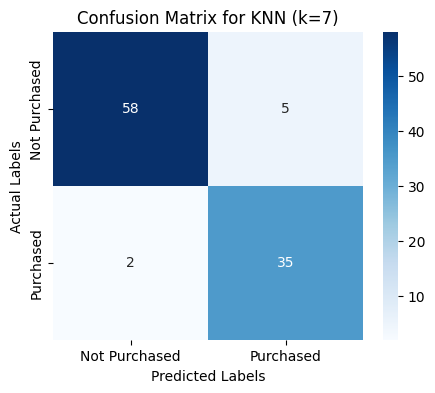

 Evaluation Results for Decision Tree (Gini):
Accuracy: 0.8400
Precision: 0.8000
Recall: 0.7568
F1-Score: 0.7778

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        63
           1       0.80      0.76      0.78        37

    accuracy                           0.84       100
   macro avg       0.83      0.82      0.83       100
weighted avg       0.84      0.84      0.84       100



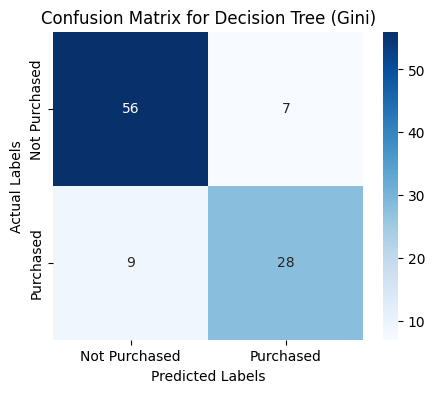

 Evaluation Results for Decision Tree (Entropy):
Accuracy: 0.8400
Precision: 0.8000
Recall: 0.7568
F1-Score: 0.7778

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        63
           1       0.80      0.76      0.78        37

    accuracy                           0.84       100
   macro avg       0.83      0.82      0.83       100
weighted avg       0.84      0.84      0.84       100



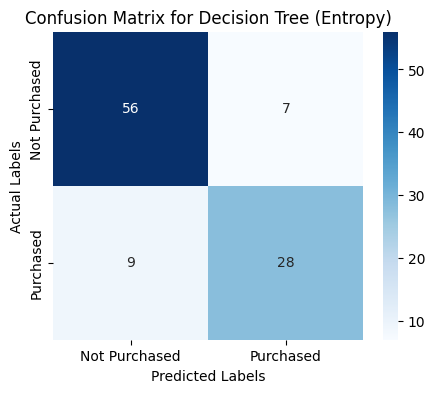

In [30]:
# Evaluate Gaussian Naive Bayes model
evaluate_model(gnb, X_test, y_test, "Gaussian Naive Bayes")

# Loop through different KNN models trained with k=3, k=5, and k=7
for k, knn_model in knn_models.items():
    # Evaluate each KNN model by passing the correct k-value and trained model
    evaluate_model(knn_model, X_test, y_test, f"KNN (k={k})")

# Evaluate Decision Tree model trained with Gini criterion
evaluate_model(dt_gini, X_test, y_test, "Decision Tree (Gini)")

# Evaluate Decision Tree model trained with Entropy criterion
evaluate_model(dt_entropy, X_test, y_test, "Decision Tree (Entropy)")

### Model Performance Summary

- **Best Model:** **KNN (k=7)**
  - **Accuracy:** 93.00% (Highest, tied with GNB)
  - **Precision:** 87.50%
  - **Recall:** 94.59% (Best at identifying actual purchasers)
  - **F1-Score:** 90.91% (Best overall balance)
  
- **Strong Alternative:** **Gaussian Naive Bayes (GNB)**
  - **Accuracy:** 93.00%  
  - **Precision:** 94.12% (Best at avoiding false positives)  
  - **Recall:** 86.49%  
  - **F1-Score:** 90.14%  

- **Decision Tree (Gini & Entropy)**  
  - Accuracy: **84.00%** (Lower than KNN & GNB)  
  - Lower recall & precision, making it less reliable  

 **KNN (k=7) is the best model due to its high recall and F1-score, while GNB is preferable if precision is more important.**  